![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
#Carga Información
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Análisis Descriptivo de Season
bikes_season = bikes['season']
bikes_season.describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

In [6]:
# Moda y Mediana Season
print(bikes_season.mode())
print(bikes_season.median())

0    4
Name: season, dtype: int64
3.0


De acuerdo con los anteriores resultados, la variable *season* tiene 4 valores, lo que deacuerdo con el nombre de la variable se puede asumir que esta variable es categoria y corresponde a als cuatro estaciones climaticas del año.
- Tenemos que la media es igual a 2.5066, evidenciando una frecuencia ligeramente mayor de valores es las season 2 y 3 como se muestra en la media de los valores agrupados. 
- La desviación estándar es de 1.1161 indicando que los valores de la variable están dispersos en torna a la media de una manera moderada.


In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
# Análisis Descriptivo de hour
bikes_hour = bikes['hour']
# bikes_hour.describe()
bikes.hour.describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

In [9]:
print(bikes_hour.mode())
print(bikes_hour.median())

0     12
1     13
2     14
3     15
4     16
5     17
6     18
7     19
8     20
9     21
10    22
11    23
Name: hour, dtype: int64
12.0


De acuerdo con los anteriores resultados, la variable *hour* tiene 24 valores correspondientes a las 24 horas del día, con lo que se asume que esta variable es categoria.
- Tenemos que la media es igual a 11.5416, lo que nos indica que es una varialbe discreta. 
- La desviación estándar es de 6.9158, muestra de que los datos se encuentran dispersos con respecto a la media.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

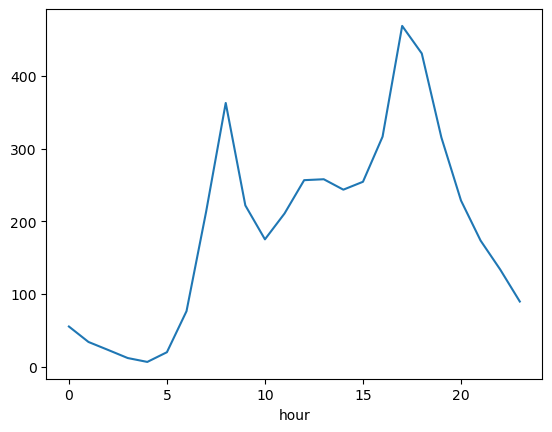

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

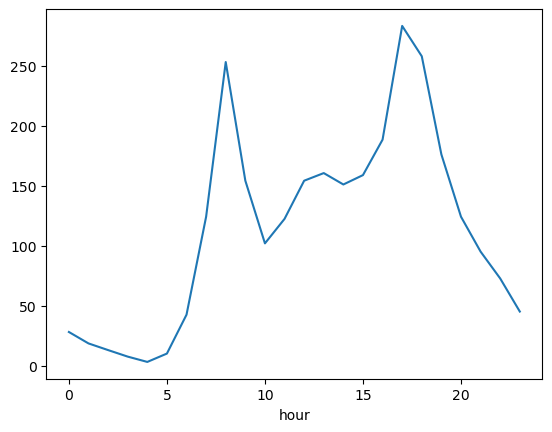

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_season_1 = bikes[bikes['season'] == 1 ]
bikes_season_1.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

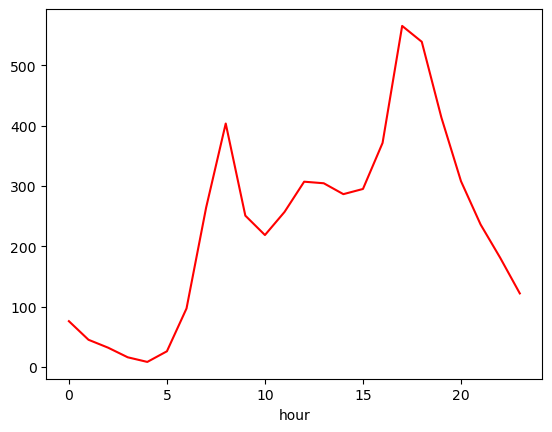

In [12]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_season_3 = bikes[bikes['season'] == 3 ]
bikes_season_3.groupby('hour').total.mean().plot(color = 'red')

De acuerdo al resultado de las graficas, se puede evidenciar que:
- El comportamiento horario es similiar con respecto al alquiler de bicicletas durante el día, sin importar la estación en la que se encuentre. 
- El patron de la grafica es homologo en la mayoria de horas. Entre las horas 8 y 10, en la estación 1, el alquiler presenta una disminución mayor generando una mayor pendiente en la grafica.
- La estación 1, puede ser una de las estaciones donde menos alquileres de bicicletas se realizan, ya que el promedio por hora es considerable mente menor frente al promedio y la diferencia se hace mas relevante frente a la estación 3.
- De la misma manera, podemos visualizar que durante la estacion 3 se concentra el mayor alquiler de bicicletas.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [13]:
# Celda 3
from sklearn.model_selection import train_test_split
modelo = LinearRegression()

In [14]:
# Codificación de variable Season
bikes['season'] = pd.factorize(bikes.season)[0]

In [15]:
# Selección variables predictoras y respuesta
X = bikes[['season','hour']]
# feature_cols = bikes.iloc[:,[0,11]]
# feature_cols = feature_cols.reset_index(drop = True)
y = bikes['total']
# Y = Y.reset_index(drop=True)
# X = feature_cols

In [16]:
# Modelo e impresión de coeficientes e intersección de Train
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)
modelo.fit(XTrain,yTrain)
print('Coeficientes Train:', modelo.coef_)
print('Intersección Train:', modelo.intercept_)

Coeficientes Train: [28.03619568 10.57944293]
Intersección Train: 25.796314550936643


In [17]:
# Modelo e impresión de coeficientes e intersección de Test
modelo.fit(XTest,yTest)
print('Coeficientes Test:', modelo.coef_)
print('Intersección: Test', modelo.intercept_)

Coeficientes Test: [24.67992116 10.39534339]
Intersección: Test 37.38660768420186


In [18]:
ypred = modelo.predict(XTest)
ypred

array([255.68881891, 228.39202312, 203.71210195, ..., 217.99667972,
       350.51926919, 236.17049188])

In [19]:
MSEL = mean_squared_error(yTest, ypred)
MSEL

26861.22801145081



De acuerdo a los resultados, los coeficientes de **season** nos indica que el alquiler de bicicletas aumentara 28.0361 veces por cada una de las estaciones partiendo desde 1 a 4.  
  
Teniendo en cuenta esta información y la interpretacion de la intersección el cual nos indica que cuando la estación y la hora sean 0, la cantidad de alquileres es de 25 bicicletas de acuerdo a train y 37 de acuerdo a test.  

El modelo regresión lineal tiene como posibles limitaciones el supuesto de linealidad el cual nos dice que la relación entre ambas variables **season** y **hour**  es lineal con respecto a la variable respuesta. También es un módelo altamente influenciable con respecto a los valores atípicos, que con el caso, puede tener estos comportamiento de acuerdo a la fecha, festividad u otro relacionado a la toma de datos.

# Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [20]:
# Celda 4 - Definición de Parámetros
max_depth = None
num_pct = 12
max_features = None
min_gain=0.001

In [21]:
j = 1
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)

In [22]:
features = range(X.shape[1])
features

range(0, 2)

In [23]:
#División de Observaciones
k=5
filter_l = X.iloc[:, j] < splits[k]
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Funcion gini_index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# <= a pinto de corte
gini_l = gini(y_l)
gini_l

# >= a punto de corte
gini_r = gini(y_r)
gini_r

# Definición gini_imputiry 
def gini_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

#Todas las ganancias
def best_split (X, y, num_pct):
    features = range(X.shape[1])
    best_split = [0, 0, 0]
    
    for j in features: 
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
            
            if gain > best_split[2]:
                best_split = [j, split, gain]
                
    return best_split

In [24]:
gini_impurity(X.iloc[:, j], y, splits[k])

11001.404955790655

In [25]:
j, split, gain = best_split(X, y, 6)
j, split, gain

(1, 6.0, 18120.937290485905)

In [26]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [27]:
tree_grow(X, y, level=0, min_gain=0.001, max_depth=10, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [1, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [0, 1.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [1, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [28]:
# Celda 5
# Creación Arbol con DecisionTreeRegressor
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

#Entrenamiento
treereg.fit(XTrain, yTrain)

DecisionTreeRegressor(random_state=123)

In [29]:
y_pred = treereg.predict(XTest)

In [30]:
MSE = np.sqrt(mean_squared_error(y_pred, yTest))
MSE

115.73764294643983

Se evidencia que el MSE con los arboles de decisión es bastante menor que el calculado con el modelo de regersión lineal, ya que estos resultados indican que las predicciones con el modelo de arboles de decisión son en promedio más precias que el modelo de regresión lineal. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [31]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [32]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [33]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [34]:
# Celda 6
from sklearn.linear_model import LogisticRegression

models = {'Arboles': DecisionTreeRegressor(),
          'Regresión Log': LogisticRegression()}

for model in models.keys():
    models[model].fit(X_train, y_train)
    
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, f1_score
for model in models.keys():
    print(model,accuracy_score(y_pred[model], y_test))

Arboles 0.5413333333333333
Regresión Log 0.614


In [36]:
for model in models.keys():
    print(model,f1_score(y_pred[model], y_test))

Arboles 0.5370121130551817
Regresión Log 0.6111484217595702


De acuerdo a los valores de **accuracy score** y **f1 score**, se encuentra que el módelo de regresión logística tiene mejor desempeño que el modelo de arboles, reflejando un mayor equilibrio de acuerdo al **f1 score** = a 0.61 y una presición de 61.4% según el resultado de **accuracy score**

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [37]:
# Celda 7
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf_dtc_max = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, bootstrap=True,
                        oob_score=True)
clf_dtc_min = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10), n_estimators=100, bootstrap=True,
                        oob_score=True)
clf_rl = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        oob_score=True)

In [39]:
# Arbol max_depth
clf_dtc_max.fit(X_train, y_train)
y_pred = clf_dtc_max.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6636005256241787, 0.6586666666666666)

In [40]:
# Arbol min_samples_leaf
clf_dtc_min.fit(X_train, y_train)
y_pred = clf_dtc_min.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6596166556510243, 0.6566666666666666)

In [41]:
# Regresion Logistica
clf_rl.fit(X_train, y_train)
y_pred = clf_rl.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.61455525606469, 0.6186666666666667)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [42]:
# Celda 8
# Ponderada Arbol max_depth
errors = np.zeros(clf_dtc_max.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_dtc_max.n_estimators))

for i in range(clf_dtc_max.n_estimators):
    oob_sample = ~ clf_dtc_max.estimators_samples_[i]
    y_pred_ = clf_dtc_max.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_dtc_max.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [44]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6561056105610562, 0.6526666666666666)

In [45]:
# Ponderada Arbol min_samples_leaf
errors = np.zeros(clf_dtc_min.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_dtc_min.n_estimators))

for i in range(clf_dtc_min.n_estimators):
    oob_sample = ~ clf_dtc_min.estimators_samples_[i]
    y_pred_ = clf_dtc_min.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_dtc_min.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [46]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6576637407157325, 0.662)

In [47]:
# Ponderada Regresión Logistica
errors = np.zeros(clf_rl.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf_rl.n_estimators))

for i in range(clf_rl.n_estimators):
    oob_sample = ~ clf_rl.estimators_samples_[i]
    y_pred_ = clf_rl.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf_dtc_min.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [48]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6563133018230926, 0.6606666666666666)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

#### Celda 9

